In [1]:
import pandas as pd
import numpy as np
import json

In [2]:
import requests
from timeit import default_timer as timer

## Gather

In [3]:
# import twitter archive file
twt_archive = pd.read_csv('twitter-archive-enhanced.csv')
twt_archive.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [4]:
# get image prediction file & save it
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)
with open("image-predictions.tsv", mode = 'wb') as file:
    file.write(r.content)

In [5]:
# import image prediction file
img_predict = pd.read_csv('image-predictions.tsv', sep = '\t')
img_predict.head(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [6]:
import tweepy

consumer_key = '***' #'YOUR CONSUMER KEY'
consumer_secret = '***' #'YOUR CONSUMER SECRET'
access_token = '***' #'YOUR ACCESS TOKEN'
access_secret = '***' #'YOUR ACCESS SECRET'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit = True,
                wait_on_rate_limit_notify = True)

In [7]:
tweet_ids = twt_archive.tweet_id.tolist()
len(tweet_ids)

2356

In [8]:
tweet_errors = {}
count = 0
start = timer()

# Save tweets' json to .txt file
with open('tweet_json.txt', mode = 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(count)
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            
        except tweepy.TweepError as e:
            tweet_errors[tweet_id] = e
            print(str(count) + " : " + str(tweet_id) + " error")
            pass

        
end = timer()
print("Time in minutes: %.2f"%((end - start)/60))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
20 : 888202515573088257 error
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
96 : 873697596434513921 error
97
98
99
100
101
102
102 : 872668790621863937 error
103
104
105
105 : 872261713294495745 error
106
107
108
109
110
111
112
113
114
115
116
117
118
119
119 : 869988702071779329 error
120
121
122
123
124
125
126
127
128
129
130
131
132
133
133 : 866816280283807744 error
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
156 : 861769973181624320 error
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
183 : 856602993587888130 error
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
21

Rate limit reached. Sleeping for: 328


903
904
905
906
907
908
909
910
911
912
913
914
915
916
917
918
919
920
921
922
923
924
925
926
927
928
929
930
931
932
933
933 : 754011816964026368 error
934
935
936
937
938
939
940
941
942
943
944
945
946
947
948
949
950
951
952
953
954
955
956
957
958
959
960
961
962
963
964
965
966
967
968
969
970
971
972
973
974
975
976
977
978
979
980
981
982
983
984
985
986
987
988
989
990
991
992
993
994
995
996
997
998
999
1000
1001
1002
1003
1004
1005
1006
1007
1008
1009
1010
1011
1012
1013
1014
1015
1016
1017
1018
1019
1020
1021
1022
1023
1024
1025
1026
1027
1028
1029
1030
1031
1032
1033
1034
1035
1036
1037
1038
1039
1040
1041
1042
1043
1044
1045
1046
1047
1048
1049
1050
1051
1052
1053
1054
1055
1056
1057
1058
1059
1060
1061
1062
1063
1064
1065
1066
1067
1068
1069
1070
1071
1072
1073
1074
1075
1076
1077
1078
1079
1080
1081
1082
1083
1084
1085
1086
1087
1088
1089
1090
1091
1092
1093
1094
1095
1096
1097
1098
1099
1100
1101
1102
1103
1104
1105
1106
1107
1108
1109
1110
1111
1112
1113
1114
1115
1

Rate limit reached. Sleeping for: 245


1803
1804
1805
1806
1807
1808
1809
1810
1811
1812
1813
1814
1815
1816
1817
1818
1819
1820
1821
1822
1823
1824
1825
1826
1827
1828
1829
1830
1831
1832
1833
1834
1835
1836
1837
1838
1839
1840
1841
1842
1843
1844
1845
1846
1847
1848
1849
1850
1851
1852
1853
1854
1855
1856
1857
1858
1859
1860
1861
1862
1863
1864
1865
1866
1867
1868
1869
1870
1871
1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002


In [9]:
print(tweet_errors)

{888202515573088257: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 873697596434513921: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872668790621863937: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 872261713294495745: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 869988702071779329: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 866816280283807744: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 861769973181624320: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 856602993587888130: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 845459076796616705: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 844704788403113984: TweepError([{'code': 144, 'message': 'No status found with that ID.'}]), 842892208864923648: TweepError([{'code': 144, 'message': 'No status f

In [10]:
for key in tweet_errors.keys():
    print(key)

888202515573088257
873697596434513921
872668790621863937
872261713294495745
869988702071779329
866816280283807744
861769973181624320
856602993587888130
845459076796616705
844704788403113984
842892208864923648
837012587749474308
827228250799742977
812747805718642688
804738756058218496
802247111496568832
775096608509886464
770743923962707968
754011816964026368
680055455951884288


In [11]:
twt_data_list = []

# read each line as json to extract data
with open('tweet_json.txt', 'r') as filehandle:  
    for line in filehandle:
        data = json.loads(line)
        
        tweet_id = data['id']
        full_text = data['full_text']
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']
        
        twt_data_list.append({'tweet_id': tweet_id,
                              'full_text': full_text,
                              'favorite_count': favorite_count,
                              'retweet_count': retweet_count})

twt_data = pd.DataFrame(twt_data_list, columns = ['tweet_id', 'full_text', 'favorite_count', 'retweet_count'])


In [12]:
twt_data.head(2)

,tweet_id,full_text,favorite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,37568,8196
1,892177421306343426,This is Tilly. She's just checking pup on you....,32295,6059


## Assess

In [13]:
twt_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [14]:
twt_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [15]:
twt_archive[~twt_archive.in_reply_to_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
149,863079547188785154,6.671522e+17,4.196984e+09,2017-05-12 17:12:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/863079547...,14,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
184,856526610513747968,8.558181e+17,4.196984e+09,2017-04-24 15:13:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/856526610...,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None


In [16]:
twt_archive[~twt_archive.retweeted_status_id.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [17]:
twt_archive.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [18]:
twt_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [19]:
twt_archive.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [20]:
sum((twt_archive.pupper == 'pupper') & (twt_archive.doggo == 'doggo'))

12

In [21]:
sum((twt_archive.floofer == 'floofer') & (twt_archive.doggo == 'doggo'))

1

In [22]:
sum((twt_archive.puppo == 'puppo') & (twt_archive.doggo == 'doggo'))

1

In [23]:
print(twt_archive[(twt_archive.pupper == 'pupper') & (twt_archive.doggo == 'doggo')].index)

Int64Index([460, 531, 565, 575, 705, 733, 778, 822, 889, 956, 1063, 1113], dtype='int64')


In [24]:
twt_archive['text'][705]

"This is Pinot. He's a sophisticated doggo. You can tell by the hat. Also pointier than your average pupper. Still 10/10 would pet cautiously https://t.co/f2wmLZTPHd"

In [25]:
twt_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [26]:
twt_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [27]:
twt_archive.tweet_id.duplicated().sum()

0

In [28]:
len(twt_archive[~twt_archive.tweet_id.isin(twt_data.tweet_id)])

20

In [29]:
twt_archive.name.value_counts().sort_index()

Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old         

In [30]:
twt_archive.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [31]:
img_predict

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [32]:
img_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [33]:
img_predict.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
malamute                      30
cocker_spaniel                30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
web_site                      19
Cardigan                      19
teddy                         18
Shetland_sheepdog             18
Maltese_dog                   18
beagle                        18
Eskimo_dog                    18
Rottweiler                    17
Shih-Tzu                      17
Lakeland_terrier              17
Italian_greyhound             16
kuvasz                        16
          

In [34]:
img_predict.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [35]:
len(img_predict[~img_predict.tweet_id.isin(twt_data.tweet_id)])

11

In [36]:
twt_data

,tweet_id,full_text,favorite_count,retweet_count
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,37568,8196
1,892177421306343426,This is Tilly. She's just checking pup on you....,32295,6059
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,24339,4008
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,40924,8352
4,891327558926688256,This is Franklin. He would like you to stop ca...,39117,9045
5,891087950875897856,Here we have a majestic great white breaching ...,19674,3004
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,11498,1985
7,890729181411237888,When you watch your owner call another dog a g...,63405,18205
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,27042,4121
9,890240255349198849,This is Cassie. She is a college pup. Studying...,30991,7117


In [37]:
twt_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2336 entries, 0 to 2335
Data columns (total 4 columns):
tweet_id          2336 non-null int64
full_text         2336 non-null object
favorite_count    2336 non-null int64
retweet_count     2336 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.1+ KB


### Quality Issues
*`twt_archive` table*

- Some old tweets that didn't found in twitter any more
- Have in_reply & retweeted
- Columns full of null value (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)
- Some dogs have stages in both doggo & (floofer, pupper, puppo) columns
- Erroneous datatype of (timestamp, retweeted_status_timestamp) columns
- Rating_numerator column has wrong values.
- Rating_denominator column has values other than 10
- Some rows have wrong dog names (a, an, very, the, etc..)
- Source column has html tags
- stage column datatype (the column will be created while dealing with tidness issues)

*`img_predict` table*
- Table has Some old tweets that didn't found in twitter any more
- dog_breed column datatype (the column will be created while dealing with tidness issues)


### Tidness Issues
- one variable in four columns in `twt_archive` table (stage)
- `twt_data` table and `twt_archive` table must be one table
- (p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) columns in `img_predict` table is confusing must be exchanged with one variable (dog_breed)

## Clean

In [38]:
twt_data_clean = twt_data.copy()
twt_archive_clean = twt_archive.copy()
img_predict_clean = img_predict.copy()

`img_predict` table & `twt_archive` table have Some old tweets that didn't found in twitter any more

#### Define
drop rows from `twt_archive` & `img_predict` table with tweet_id that not exist in `twt_data` table

In [39]:
## Code
twt_archive_clean = twt_archive_clean[twt_archive_clean.tweet_id.isin(twt_data_clean.tweet_id)]
img_predict_clean = img_predict_clean[img_predict_clean.tweet_id.isin(twt_data_clean.tweet_id)]

In [40]:
## Test
print(len(twt_archive_clean[~twt_archive_clean.tweet_id.isin(twt_data_clean.tweet_id)]))
print(len(img_predict_clean[~img_predict_clean.tweet_id.isin(twt_data_clean.tweet_id)]))

0
0


Have in_reply & retweeted in `twt_archive` table  

#### Define
Drop rows with replys & retweets

In [41]:
## Code
twt_archive_clean = twt_archive_clean[twt_archive_clean.in_reply_to_user_id.isnull()]
twt_archive_clean = twt_archive_clean[twt_archive_clean.retweeted_status_id.isnull()]

In [42]:
## Test
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2092 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
timestamp                     2092 non-null object
source                        2092 non-null object
text                          2092 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2089 non-null object
rating_numerator              2092 non-null int64
rating_denominator            2092 non-null int64
name                          2092 non-null object
doggo                         2092 non-null object
floofer                       2092 non-null object
pupper                        2092 non-null object
puppo                         2092 non-null object
dtypes: float64(4), int64(3), object(10)

Columns full of null value in `twt_archive` table (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

#### Define
Drop Columns in `twt_archive` table (in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp)

Drop text column too. (i will use the full_text column in `twt_data` table, to keep all data new just in case)

In [43]:
## Code 
twt_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'text'], axis = 1, inplace = True)

In [44]:
## Test
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2092 non-null int64
timestamp             2092 non-null object
source                2092 non-null object
expanded_urls         2089 non-null object
rating_numerator      2092 non-null int64
rating_denominator    2092 non-null int64
name                  2092 non-null object
doggo                 2092 non-null object
floofer               2092 non-null object
pupper                2092 non-null object
puppo                 2092 non-null object
dtypes: int64(3), object(8)
memory usage: 196.1+ KB


Some dogs have stages in both doggo & (floofer, pupper, puppo) columns

#### Define
*according dogtionary* 
- Doggo: big pupper (not stop behaving like a pupper)
- Pupper: small doggo
---------------------------------------
- replace doggo column with None for rows having 2 stages doggo & (floofer, puppo)
- replace pupper column with None for rows having 2 stages doggo & pupper

In [45]:
## Code
twt_archive_clean['doggo'][(twt_archive_clean.floofer == 'floofer') & (twt_archive_clean.doggo == 'doggo')] = 'None'
twt_archive_clean['doggo'][(twt_archive_clean.puppo == 'puppo') & (twt_archive_clean.doggo == 'doggo')] = 'None'
twt_archive_clean['pupper'][(twt_archive_clean.pupper == 'pupper') & (twt_archive_clean.doggo == 'doggo')] = 'None'

/home/taghreed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/taghreed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/taghreed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.

In [46]:
## Test
print(sum((twt_archive_clean.floofer == 'floofer') & (twt_archive_clean.doggo == 'doggo')))
print(sum((twt_archive_clean.puppo == 'puppo') & (twt_archive_clean.doggo == 'doggo')))
print(sum((twt_archive_clean.pupper == 'pupper') & (twt_archive_clean.doggo == 'doggo')))

0
0
0


### Tidness
One variable in four columns in `twt_archive` table (stage)

#### Define
Melt the doggo, floofer, pupper & puppo columns to a dog_stage column.

In [47]:
twt_archive_clean.replace('None', np.nan, inplace=True)
twt_archive_clean['stage'] = twt_archive_clean.doggo.str.cat(twt_archive_clean.floofer, na_rep='').str.cat(twt_archive_clean.pupper, na_rep='').str.cat(twt_archive_clean.puppo, na_rep='')

In [48]:
## Test
twt_archive_clean.replace('', np.nan, inplace=True)
twt_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2092 non-null int64
timestamp             2092 non-null object
source                2092 non-null object
expanded_urls         2089 non-null object
rating_numerator      2092 non-null int64
rating_denominator    2092 non-null int64
name                  1489 non-null object
doggo                 81 non-null object
floofer               10 non-null object
pupper                221 non-null object
puppo                 24 non-null object
stage                 336 non-null object
dtypes: int64(3), object(9)
memory usage: 212.5+ KB


In [49]:
## Test: compare values to check
twt_archive_clean.stage.value_counts()

pupper     221
doggo       81
puppo       24
floofer     10
Name: stage, dtype: int64

In [50]:
# variable
twt_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace = True)

`twt_data` table and `twt_archive` table must be one table

#### Define
Merge the `twt_archive` table's columns to the `twt_data` table, joining on tweet_id.

In [51]:
## Code 
twt_data_clean = pd.merge(twt_data_clean, twt_archive_clean, 
                          on='tweet_id', how = 'right')

In [52]:
## Test
list(twt_data_clean)

['tweet_id',
 'full_text',
 'favorite_count',
 'retweet_count',
 'timestamp',
 'source',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'name',
 'stage']

(p1, p1_conf, p1_dog, p2, p2_conf, p2_dog, p3, p3_conf, p3_dog) columns in `img_predict` table is confusing must be exchanged with one variable (dog_breed)

#### Define
According confident columns p1_conf > p2_conf > p3_conf so 

|         IF                              |       THEN       |
|:----------------------------------------|:----------------:|
| p1_dog = True                           | dog_bread = p1   |
| p1_dog = False & p2_dog = True          | dog_bread = p2   |
| p1_dog & p2_dog = False & p3_dog = True | dog_bread = p3   |
| p1_dog & p2_dog & p3_dog = False        | dog_bread = unclassified |

In [53]:
## Code
def dogs_breed(row):
    if row['p1_dog'] == True:
        breed = row['p1']
        
    elif row['p2_dog'] == True:
        breed = row['p2']
        
    elif row['p3_dog'] == True:
        breed = row['p3']
        
    else:
        breed = 'unclassified'
    
    return breed

img_predict_clean['dog_breed'] = img_predict_clean.apply(dogs_breed, axis = 1)

img_predict_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], axis=1, inplace = True)

In [55]:
## Test
img_predict_clean.dog_breed.value_counts()

unclassified                      323
golden_retriever                  173
Labrador_retriever                111
Pembroke                           95
Chihuahua                          93
pug                                65
toy_poodle                         52
chow                               51
Samoyed                            45
Pomeranian                         42
malamute                           34
cocker_spaniel                     33
Chesapeake_Bay_retriever           31
French_bulldog                     30
miniature_pinscher                 26
Cardigan                           23
Staffordshire_bullterrier          22
Eskimo_dog                         22
German_shepherd                    21
beagle                             21
Siberian_husky                     20
Shih-Tzu                           20
Lakeland_terrier                   19
Maltese_dog                        19
kuvasz                             19
Rottweiler                         19
Shetland_she

### Quality

Erroneous datatype of (timestamp) column in `twt_archive` table

Stage column datatype (the column will be created while dealing with tidness issues)

#### Define
Convert the timestamp column's data type to datetime.

Convert Stage column 's data type to category

In [56]:
## Code 
twt_data_clean.timestamp = pd.to_datetime(twt_archive_clean.timestamp)
twt_data_clean.stage = twt_data_clean.stage.astype('category')

In [57]:
## Test
twt_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2092 entries, 0 to 2091
Data columns (total 11 columns):
tweet_id              2092 non-null int64
full_text             2092 non-null object
favorite_count        2092 non-null int64
retweet_count         2092 non-null int64
timestamp             1834 non-null datetime64[ns]
source                2092 non-null object
expanded_urls         2089 non-null object
rating_numerator      2092 non-null int64
rating_denominator    2092 non-null int64
name                  1489 non-null object
stage                 336 non-null category
dtypes: category(1), datetime64[ns](1), int64(5), object(4)
memory usage: 182.0+ KB


rating_numerator column has wrong values.

rating_denominator column has values other than 10.
#### Define
extract rating from full text column using extract with regular expression

In [58]:
## Code
twt_data_clean['rating'] = twt_data_clean.full_text.str.extract('(\d+([.]\d+)?\/\d+0)', expand=True)[0]

In [59]:
twt_data_clean.rating.value_counts().sort_values(ascending=False)

12/10       484
10/10       436
11/10       413
13/10       285
9/10        153
8/10         98
7/10         51
14/10        39
5/10         33
6/10         32
3/10         19
4/10         15
2/10          9
1/10          4
144/120       1
60/50         1
11.26/10      1
88/80         1
121/110       1
99/90         1
80/80         1
84/70         1
4/20          1
1776/10       1
0/10          1
13.5/10       1
420/10        1
50/50         1
165/150       1
11.27/10      1
44/40         1
45/50         1
204/170       1
9.75/10       1
Name: rating, dtype: int64

In [62]:
print(twt_data_clean['full_text'][944])
twt_data_clean[twt_data_clean.rating == '4/20']

Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a


,tweet_id,full_text,favorite_count,retweet_count,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,stage,rating


In [63]:
twt_data_clean['rating'][twt_data_clean.rating == '4/20'] = '13/10'

/home/taghreed/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [64]:
print(twt_data_clean['full_text'][401])
twt_data_clean[twt_data_clean.rating.isnull()]

Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. 
Keep Sam smiling by clicking and sharing this link:
https://t.co/98tB8y7y7t https://t.co/LouL5vdvxx


,tweet_id,full_text,favorite_count,retweet_count,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,stage,rating
401,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspir...,5633,1552,2017-01-26 17:02:56,"<a href=""http://twitter.com/download/iphone"" r...","https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,NaN,NaN


In [65]:
twt_data_clean['rating_numerator'], twt_data_clean['rating_denominator'] = twt_data_clean.rating.str.split('/').str

twt_data_clean.rating_numerator.replace(np.nan, 0, inplace=True)
twt_data_clean.rating_denominator.replace(np.nan, 0, inplace=True)

twt_data_clean.rating_denominator = twt_data_clean.rating_denominator.astype(int)
twt_data_clean.rating_numerator = round(twt_data_clean.rating_numerator.astype(float)).astype(int)

twt_data_clean.rating_numerator -= (twt_data_clean.rating_denominator - 10)

In [66]:
twt_data_clean.drop(['rating_denominator', 'rating'], axis=1, inplace = True)

In [67]:
## Test
twt_data_clean.rating_numerator.value_counts().sort_values(ascending=False)

12      484
10      440
11      415
13      286
9       153
8        98
7        51
14       41
5        34
6        32
3        19
4        15
2         9
1         4
19        1
25        1
18        1
44        1
20        1
24        1
34        1
21        1
420       1
1776      1
0         1
Name: rating_numerator, dtype: int64

Some rows have wrong dog names (a, an, very, the, etc..)

#### Define
replace all names start with lowercase with np.nan 

In [68]:
## Code
twt_data_clean.name.replace('^[a-z]+', np.nan, inplace=True, regex=True)

In [69]:
## Test
twt_data_clean.name.value_counts().sort_values(ascending=False)

Lucy         11
Charlie      10
Oliver       10
Cooper       10
Tucker        9
Penny         9
Sadie         8
Lola          8
Winston       8
Toby          7
Daisy         7
Oscar         6
Koda          6
Bailey        6
Stanley       6
Jax           6
Bo            6
Bella         6
Scout         5
Chester       5
Rusty         5
Bentley       5
Leo           5
Louis         5
Milo          5
Dave          5
Buddy         5
Gus           4
Dexter        4
Brody         4
             ..
Dallas        1
Carbon        1
Jerome        1
Mairi         1
Alfy          1
Jamesy        1
Storkson      1
Roscoe        1
Rodney        1
Sweet         1
Finnegus      1
Crawford      1
Coopson       1
Zooey         1
Robin         1
Dante         1
Oddie         1
Kollin        1
Ace           1
Sonny         1
Emma          1
Bookstore     1
Stephanus     1
Dot           1
Sparky        1
Colin         1
Lili          1
Lassie        1
Shelby        1
Kaiya         1
Name: name, Length: 928,

Source column has html tags
#### Define
get the source using extract with regular expression

In [70]:
## Code
twt_data_clean.source = twt_data_clean.source.str.extract('([a-zA-z\s-]+</a>$)', expand=True)
twt_data_clean.source = twt_data_clean.source.str[:-4]

In [71]:
## Test
twt_data_clean.source.value_counts()

Twitter for iPhone     1960
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                10
Name: source, dtype: int64

## Store

In [72]:
# Store as .csv file
twt_data_clean.to_csv('twitter_archive_master.csv', index = False)
img_predict_clean.to_csv('image_master.csv', index = False)

In [73]:
# Store as database
from sqlalchemy import create_engine
engine = create_engine('sqlite:///dogsrating.db')

In [74]:
twt_data_clean.to_sql('twitter_archive_master', engine, index=False)
img_predict_clean.to_sql('image_master', engine, index=False)

## Analyze & Visualize

In [75]:
df = pd.read_csv('twitter_archive_master.csv')
img = pd.read_csv('image_master.csv')

In [76]:
# load data from the database
df = pd.read_sql('SELECT * FROM twitter_archive_master', engine)
img = pd.read_sql('SELECT * FROM image_master', engine)

In [77]:
df.head(2)

,tweet_id,full_text,favorite_count,retweet_count,timestamp,source,expanded_urls,rating_numerator,name,stage
0,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,37568,8196,2017-08-01 16:23:56.000000,Twitter for iPhone,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None
1,892177421306343426,This is Tilly. She's just checking pup on you....,32295,6059,2017-08-01 00:17:27.000000,Twitter for iPhone,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None


In [78]:
img.head(2)

,tweet_id,jpg_url,img_num,dog_breed
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone


In [79]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style = "darkgrid")

In [80]:
df.rating_numerator.value_counts().sort_index()

0         1
1         4
2         9
3        19
4        15
5        34
6        32
7        51
8        98
9       153
10      440
11      415
12      484
13      286
14       41
18        1
19        1
20        1
21        1
24        1
25        1
34        1
44        1
420       1
1776      1
Name: rating_numerator, dtype: int64

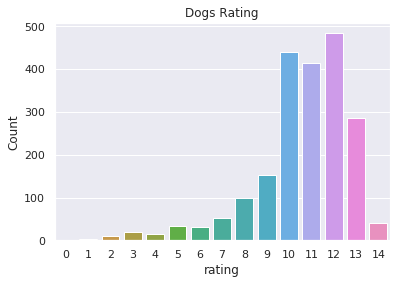

In [81]:
# plot ratings
sns.countplot(x = 'rating_numerator', data = df[df.rating_numerator < 18]);
plt.ylabel('Count');
plt.xlabel('rating');
plt.title('Dogs Rating');

In [82]:
# counts tweets per month, year
df['timestamp'] = pd.to_datetime(df.timestamp)
df_timestamp = df['timestamp'].dropna().apply(lambda x: x.strftime('%Y-%m')).value_counts().sort_index()

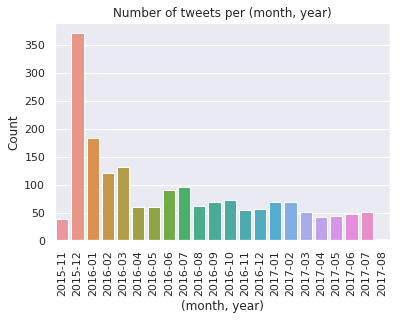

In [83]:
ax = sns.barplot(x = df_timestamp.index, y = df_timestamp.values);
ax.set_xticklabels(df_timestamp.index, rotation=90)
ax.set_title("Number of tweets per (month, year)")
plt.xlabel('(month, year)');
plt.ylabel('Count');

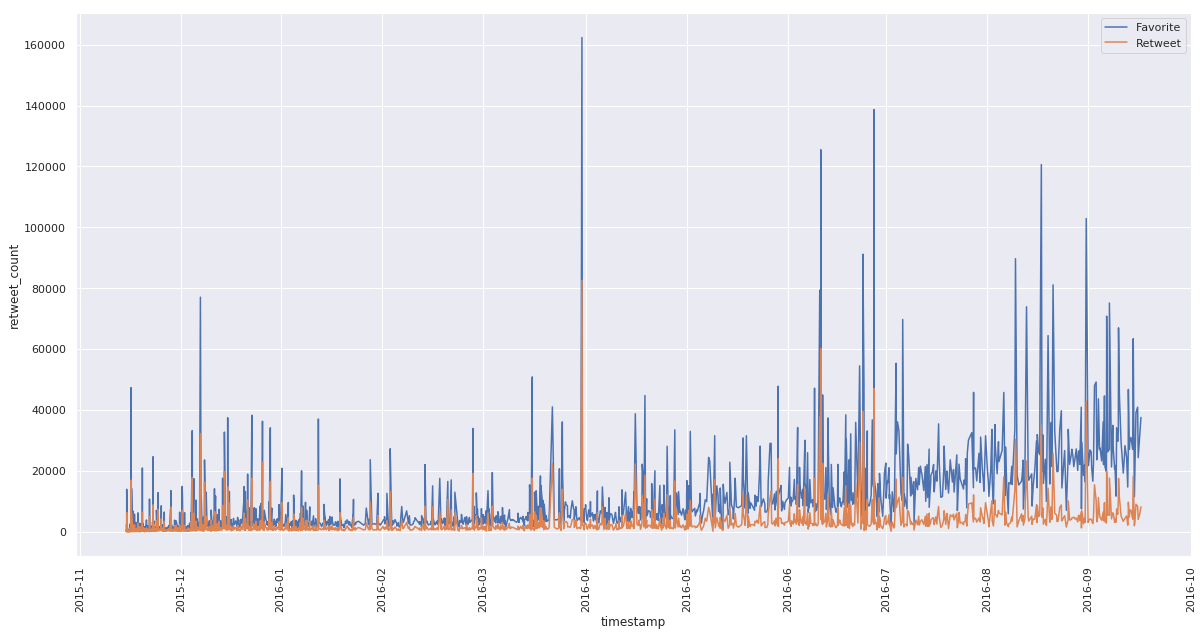

In [84]:
plt.figure(figsize = (20,10))

ax = sns.lineplot(x = "timestamp", y = df.favorite_count, data = df);
ax = sns.lineplot(x = "timestamp", y = df.retweet_count, data = df);
ax.set_xticklabels(df_timestamp.index, rotation=90);
plt.legend(['Favorite', 'Retweet']);

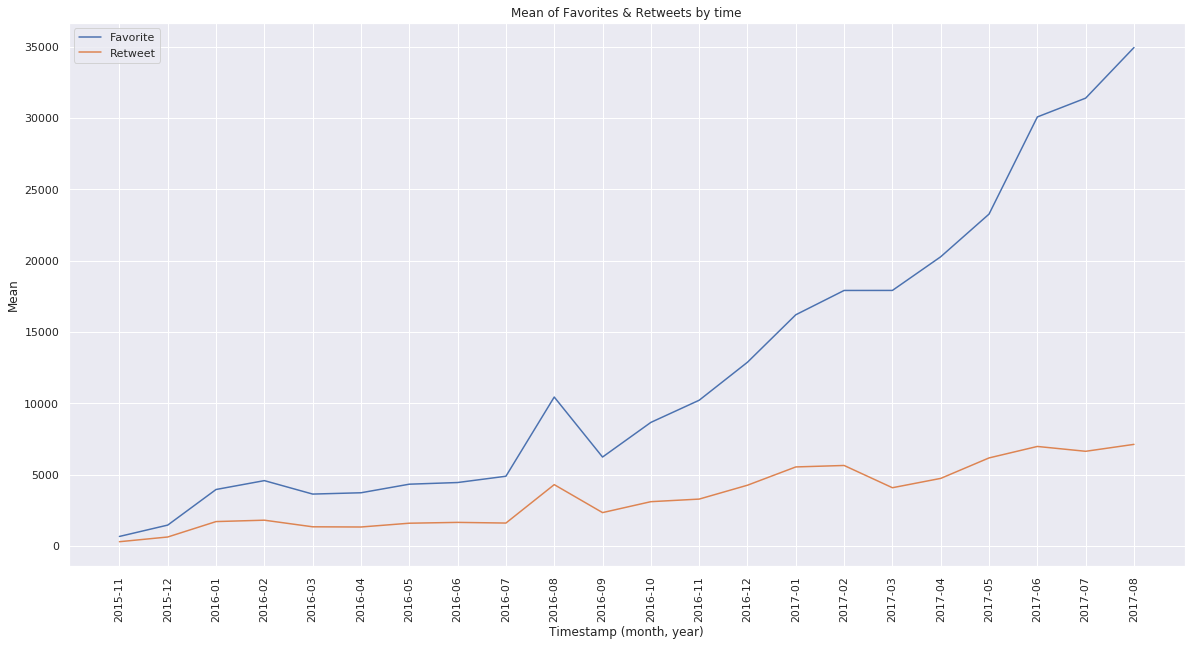

In [89]:
df_favorite = df.favorite_count.groupby(df['timestamp'].dropna().apply(lambda x: x.strftime('%Y-%m'))).mean()
df_retweet = df.retweet_count.groupby(df['timestamp'].dropna().apply(lambda x: x.strftime('%Y-%m'))).mean()

plt.figure(figsize = (20,10))

ax = sns.lineplot(x = df_favorite.index , y = df_favorite.values);
ax = sns.lineplot(x = df_retweet.index , y = df_retweet.values);
ax.set_xticklabels(df_timestamp.index, rotation=90);
plt.legend(['Favorite', 'Retweet']);
ax.set_title("Mean of Favorites & Retweets by time")
plt.xlabel('Timestamp (month, year)');
plt.ylabel('Mean');

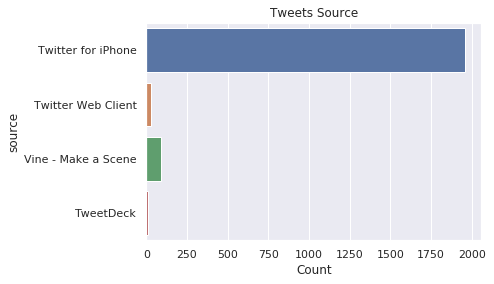

In [86]:
# show the source counts
sns.countplot(y = "source", data = df)
plt.xlabel('Count');
plt.ylabel('source');
plt.title('Tweets Source');

In [87]:
top_10_breeds = img.dog_breed.replace('unclassified', np.nan).value_counts().sort_values(ascending=False).head(10)
top_10_breeds

golden_retriever      173
Labrador_retriever    111
Pembroke               95
Chihuahua              93
pug                    65
toy_poodle             52
chow                   51
Samoyed                45
Pomeranian             42
malamute               34
Name: dog_breed, dtype: int64

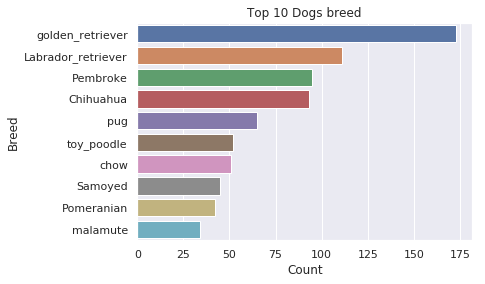

In [88]:
# show the breed counts
sns.barplot(x = top_10_breeds.values, y = top_10_breeds.index)
plt.xlabel('Count');
plt.ylabel('Breed');
plt.title('Top 10 Dogs breed');